In [6]:
from metaflow import Flow, get_metadata
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import ndimage
import numpy as np

In [2]:
!python jaccard_similarity.python show

Metaflow 2.0.5 executing JaccardSimilarityFlow for user:dev

Use Jaccard Similarity to Analyse Text Distances for ALEI Project

1. Loading Data
    1.1 Sampling Data
2. Treating Data
    2.1 Creating Text Pairs
3. Jaccard Text Similarity
    3.1 Generating Heatmap for Text Similarities
4. Evaluation
    4.1 Time Consumed
    4.2 Similarities Surface
    4.3 Using Similarities To Classify
5. Bibliography

Step start
    Load preprocessed documents
    => sampling

Step sampling
    Samples a choosen number of rows
    => creating_text_pairs

Step creating_text_pairs
    Create a new dataframe with pair of documents. If the given
    input is N the output will be NxN long.
    => caculating_similarities

Step caculating_similarities
    Measures jaccard similarity for all pair texts and sort their values
    for better visualisation.
    => end

Step end
    End the flow.
    Output data available on
        mapped_distances_df



In [4]:
!python jaccard_similarity.py --no-pylint run

Metaflow 2.0.5 executing JaccardSimilarityFlow for user:dev
Validating your flow...
    The graph looks good!
2020-05-25 13:46:32.843 Workflow starting (run-id 1590425192839182):
2020-05-25 13:46:32.846 [1590425192839182/start/1 (pid 31375)] Task is starting.
2020-05-25 13:46:44.598 [1590425192839182/start/1 (pid 31375)] Task finished successfully.
2020-05-25 13:46:44.625 [1590425192839182/sampling/2 (pid 31417)] Task is starting.
2020-05-25 13:46:45.733 [1590425192839182/sampling/2 (pid 31417)] Task finished successfully.
2020-05-25 13:46:45.738 [1590425192839182/creating_text_pairs/3 (pid 31422)] Task is starting.
2020-05-25 13:46:48.034 [1590425192839182/creating_text_pairs/3 (pid 31422)] Task finished successfully.
2020-05-25 13:46:48.039 [1590425192839182/caculating_similarities/4 (pid 31427)] Task is starting.
2020-05-25 13:46:53.611 [1590425192839182/caculating_similarities/4 (pid 31427)] Task finished successfully.
2020-05-25 13:46:53.645 [1590425192839182/end/5 (pid 31432)] Ta

In [7]:
run = Flow('JaccardSimilarityFlow').latest_successful_run
print("Using run: %s" % str(run))

Using run: Run('JaccardSimilarityFlow/1590425192839182')


In [8]:
mapped_distances_df = run.data.mapped_distances_df
mapped_distances_df

,1133635,1133645,1133745,15338756722,15338772051,1617442,1912458,2016345,2016410,2024437,...,4505955,4505979,4844347,4864054,4937939,5834605,5845246,5845272,5889227,921120
1133635,1.000000,0.017182,0.003497,0.028939,0.117739,0.053968,0.003497,0.003484,0.003484,0.010169,...,0.019608,0.003247,0.073359,0.066806,0.060440,0.003289,0.006689,0.010000,0.019608,0.044053
1133645,0.017182,1.000000,0.285714,0.016949,0.015730,0.012531,0.350000,0.400000,0.333333,0.583333,...,0.444444,0.042553,0.003497,0.012097,0.012698,0.153846,0.171429,0.228571,0.485714,0.009434
1133745,0.003497,0.285714,1.000000,0.000000,0.004535,0.007653,0.500000,0.461538,0.461538,0.260870,...,0.162162,0.000000,0.001773,0.008333,0.009772,0.200000,0.333333,0.214286,0.162162,0.004902
15338756722,0.028939,0.016949,0.000000,1.000000,0.021459,0.014218,0.020000,0.000000,0.019608,0.033333,...,0.027027,0.028169,0.020478,0.026119,0.014793,0.000000,0.000000,0.000000,0.013333,0.017094
15338772051,0.117739,0.015730,0.004535,0.021459,1.000000,0.070496,0.006818,0.002257,0.004525,0.013393,...,0.028571,0.017505,0.112360,0.098847,0.069869,0.010965,0.013304,0.013245,0.024070,0.067797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5834605,0.003289,0.153846,0.200000,0.000000,0.010965,0.012255,0.200000,0.193548,0.193548,0.146341,...,0.418605,0.017544,0.003442,0.011673,0.006135,1.000000,0.562500,0.529412,0.418605,0.004505
5845246,0.006689,0.171429,0.333333,0.000000,0.013304,0.014888,0.230769,0.222222,0.222222,0.162162,...,0.461538,0.018868,0.003466,0.019920,0.015674,0.562500,1.000000,0.600000,0.461538,0.013889
5845272,0.010000,0.228571,0.214286,0.000000,0.013245,0.012315,0.214286,0.296296,0.250000,0.216216,...,0.512821,0.018182,0.003454,0.019763,0.009288,0.529412,0.600000,1.000000,0.512821,0.009132
5889227,0.019608,0.485714,0.162162,0.013333,0.024070,0.019417,0.194444,0.257143,0.189189,0.317073,...,0.743590,0.048387,0.005111,0.019084,0.015152,0.418605,0.461538,0.512821,1.000000,0.013216


In [9]:
mapped_predictions_df  = run.data.mapped_predictions_df
mapped_predictions_df

,1133635,1133645,1133745,15338756722,15338772051,1617442,1912458,2016345,2016410,2024437,...,4505955,4505979,4844347,4864054,4937939,5834605,5845246,5845272,5889227,921120
1133635,"(True, True)","(False, True)","(False, True)","(False, True)","(False, True)","(False, True)","(False, True)","(False, False)","(False, False)","(False, True)",...,"(False, False)","(False, False)","(False, False)","(False, False)","(False, True)","(False, False)","(False, False)","(False, False)","(False, True)","(False, False)"
1133645,"(False, True)","(True, True)","(False, True)","(False, True)","(False, True)","(False, True)","(True, True)","(True, False)","(False, False)","(True, True)",...,"(True, False)","(False, False)","(False, False)","(False, False)","(False, True)","(False, False)","(False, False)","(False, False)","(True, True)","(False, False)"
1133745,"(False, True)","(False, True)","(True, True)","(False, True)","(False, True)","(False, True)","(True, True)","(True, False)","(True, False)","(False, True)",...,"(False, False)","(False, False)","(False, False)","(False, False)","(False, True)","(False, False)","(False, False)","(False, False)","(False, True)","(False, False)"
15338756722,"(False, True)","(False, True)","(False, True)","(True, True)","(False, True)","(False, True)","(False, True)","(False, False)","(False, False)","(False, True)",...,"(False, False)","(False, False)","(False, False)","(False, False)","(False, True)","(False, False)","(False, False)","(False, False)","(False, True)","(False, False)"
15338772051,"(False, True)","(False, True)","(False, True)","(False, True)","(True, True)","(False, True)","(False, True)","(False, False)","(False, False)","(False, True)",...,"(False, False)","(False, False)","(False, False)","(False, False)","(False, True)","(False, False)","(False, False)","(False, False)","(False, True)","(False, False)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5834605,"(False, False)","(False, False)","(False, False)","(False, False)","(False, False)","(False, False)","(False, False)","(False, True)","(False, True)","(False, False)",...,"(True, True)","(False, True)","(False, True)","(False, True)","(False, False)","(True, True)","(True, True)","(True, True)","(True, False)","(False, False)"
5845246,"(False, False)","(False, False)","(False, False)","(False, False)","(False, False)","(False, False)","(False, False)","(False, True)","(False, True)","(False, False)",...,"(True, True)","(False, True)","(False, True)","(False, True)","(False, False)","(True, True)","(True, True)","(True, True)","(True, False)","(False, False)"
5845272,"(False, False)","(False, False)","(False, False)","(False, False)","(False, False)","(False, False)","(False, False)","(False, True)","(False, True)","(False, False)",...,"(True, True)","(False, True)","(False, True)","(False, True)","(False, False)","(True, True)","(True, True)","(True, True)","(True, False)","(False, False)"
5889227,"(False, True)","(True, True)","(False, True)","(False, True)","(False, True)","(False, True)","(False, True)","(False, False)","(False, False)","(False, True)",...,"(True, False)","(False, False)","(False, False)","(False, False)","(False, True)","(True, False)","(True, False)","(True, False)","(True, True)","(False, False)"


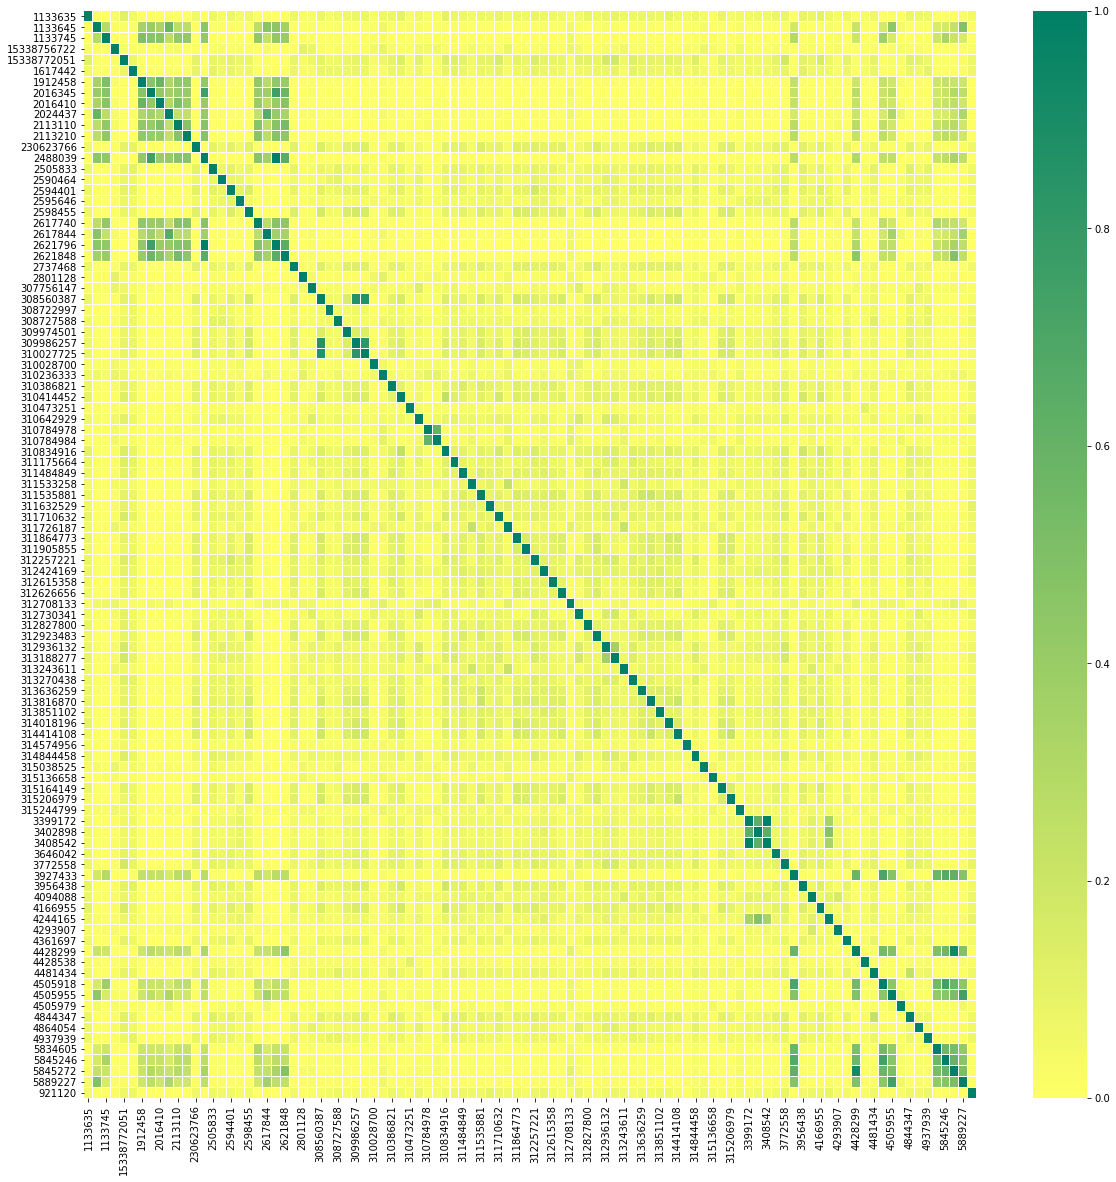

In [10]:
plt.figure(figsize=(20, 20))
ax = sns.heatmap(mapped_distances_df, cmap='summer_r', linewidths=0.01)

# 4. Evaluation

## 4.1 Time Consumed

In [13]:
print("Tempo consumido foi: ", str(run.data.total_time))

Tempo consumido foi:  0:00:17.406070


## 4.2 Similarities Surface
 If we analyses the similarities as if it was a surface we can measure how smooth they change. If the smoothness is high, the less informative the algorithm is to differentiate documents

In [14]:
result = ndimage.laplace(mapped_distances_df.to_numpy())
surface_roughness = np.average(np.absolute(result))
print("Surface Smoothness(0 to 1): ", 1 - surface_roughness)

Surface Smoothness(0 to 1):  0.8002848324279345


## Using Similarities To Classify

In [15]:
predictions_matrix = mapped_predictions_df.to_numpy()

true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0
count = 0
for i in range(1, len(predictions_matrix)):
    for j in range(i, len(predictions_matrix)):
        count += 1
        similarity_prediction, true_class = predictions_matrix[i][j]
        if similarity_prediction == true_class:
            if similarity_prediction:
                true_positive += 1
            else:
                true_negative += 1
        else:
            if similarity_prediction:
                false_positive += 1
            else:
                false_negative += 1

accuracy = (true_positive + true_negative)/(true_positive + false_positive + true_negative + false_positive)
precision = true_positive/(true_positive + false_positive)
recall = true_positive/(true_positive + false_negative)
f1_score = 2*(recall * precision)/(recall+precision)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)

Accuracy:  0.9705990444689453
Precision:  0.8048780487804879
Recall:  0.06778964667214461
F1 Score:  0.12504736642667677


# 5. Bibliography

Overview of Text Similarity Metrics in Python. Sanket Gupta. [Available at](https://towardsdatascience.com/overview-of-text-similarity-metrics-3397c4601f50) Last visited: 24/04/2020 